In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
# Import API key
api_key = "b45749ed77e8d554b0c28225ced8a5fb"

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

635


In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': api_key,
    'units': 'imperial'
}

city_name = []
country = []
date = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
count = 0

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    params['q'] = city
    response = requests.get(base_url, params=params).json()
    try:
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['coord']['lat'])
        print(f"Processing Record {count}, {city}")
        
    except:
        print("City not found")
        pass
    count += 1

Beginning Data Retrieval
-----------------------------
Processing Record 0, hue
Processing Record 1, ahipara
Processing Record 2, yellowknife
Processing Record 3, albany
Processing Record 4, georgetown
Processing Record 5, punta arenas
Processing Record 6, tarko-sale
Processing Record 7, gamba
City not found
Processing Record 9, tynda
Processing Record 10, qaanaaq
Processing Record 11, faya
Processing Record 12, swan hill
Processing Record 13, bredasdorp
Processing Record 14, atuona
Processing Record 15, barrow
Processing Record 16, ushuaia
City not found
Processing Record 18, hofn
City not found
Processing Record 20, khipro
Processing Record 21, severo-kurilsk
Processing Record 22, avarua
Processing Record 23, upernavik
Processing Record 24, severnoye
City not found
Processing Record 26, rikitea
Processing Record 27, evensk
Processing Record 28, carutapera
Processing Record 29, kuryk
Processing Record 30, kadhan
Processing Record 31, dong hoi
Processing Record 32, minot
Processing Rec

In [10]:
weather_dict = {
    "Country": country,
    "City": city_name,
    "Date": date,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (F)": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv("../output_data/cities.csv")
weather_data.dtypes

Country              object
City                 object
Date                  int64
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)          int64
Cloudiness (%)        int64
Wind Speed (mph)    float64
dtype: object

In [11]:
weather_data.head()

,Country,City,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,VN,Hue,1605339821,16.47,107.60,69.80,100,75,16.47
1,NZ,Ahipara,1605340004,-35.17,173.17,58.03,75,0,-35.17
2,CA,Yellowknife,1605340004,62.46,-114.35,-4.00,83,90,62.46
3,US,Albany,1605339974,42.60,-73.97,44.01,69,52,42.60
4,MY,George Town,1605339974,5.41,100.34,89.60,79,20,5.41


In [12]:
# Drop the cities where the humidity is less than 100%
weather_data.loc[weather_data["Humidity (%)"] == 100]

,Country,City,Date,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,VN,Hue,1605339821,16.47,107.60,69.80,100,75,16.47
48,CU,Aguada de Pasajeros,1605340010,22.39,-80.85,75.20,100,0,22.39
62,PL,Dobre Miasto,1605340011,53.99,20.40,41.00,100,90,53.99
133,US,Hailey,1605340021,43.52,-114.32,28.40,100,90,43.52
138,IE,Kinsale,1605340021,51.71,-8.53,51.01,100,90,51.71
140,US,San Patricio,1605340022,28.02,-97.52,75.00,100,40,28.02
141,US,Bethel,1605340022,41.37,-73.41,37.99,100,1,41.37
145,UA,Krasne,1605340022,49.91,24.61,41.00,100,0,49.91
176,CA,Thompson,1605339900,55.74,-97.86,19.40,100,90,55.74
181,HU,Hortobágy,1605340027,47.58,21.15,44.60,100,75,47.58


Text(0.5, 1.0, 'City Latitude vs. Max Temperature (F)')

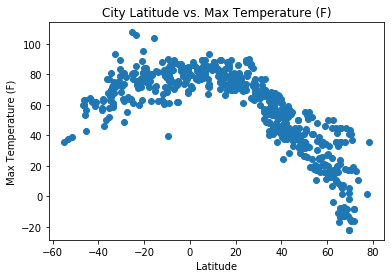

In [13]:
# Temperature (F) vs. Latitude
x_lat = weather_data["Latitude"]
y_temp = weather_data["Temperature (F)"]

plt.scatter(x_lat, y_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F)")

Text(0.5, 1.0, 'City Latitude vs. Humidity (%)')

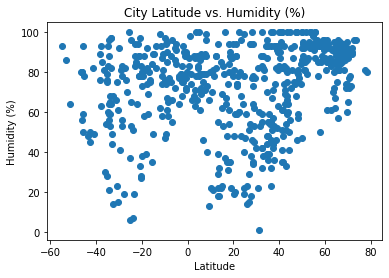

In [14]:
# Humidity (%) vs. Latitude
x_lat = weather_data["Latitude"]
y_humidity = weather_data["Humidity (%)"]

plt.scatter(x_lat, y_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (%)')

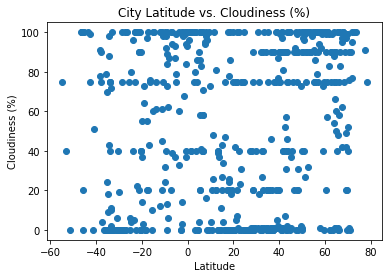

In [15]:
# Cloudiness (%) vs. Latitude
x_lat = weather_data["Latitude"]
y_cloud = weather_data["Cloudiness (%)"]

plt.scatter(x_lat, y_cloud)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (mph)')

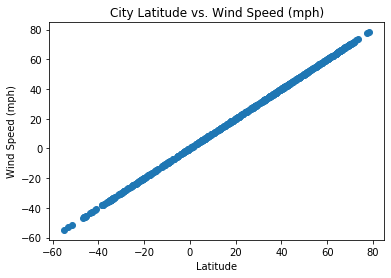

In [16]:
# Wind Speed (mph) vs. Latitude
x_lat = weather_data["Latitude"]
y_wind = weather_data["Wind Speed (mph)"]

plt.scatter(x_lat, y_wind)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)")

In [25]:
# Splitting up the data into northern and southern hemispheres
northern_weather = weather_data.loc[weather_data["Latitude"] >= 0]
southern_weather = weather_data.loc[weather_data["Latitude"] < 0]

In [26]:
 # Perform a linear regression on Northern Hemisphere Temperature vs. latitude
x_lat_north = northern_weather["Latitude"]
y_temp_north = northern_weather["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_temp_north)

# Get regression values
regress_values = x_lat_north * slope + intercept

y = -1.2x +96.93
The r-squared is: 0.8023102757164228


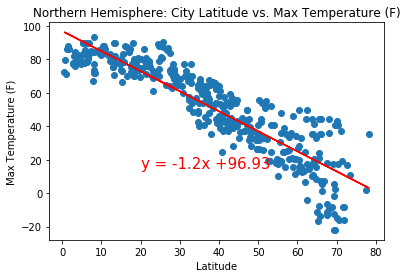

In [27]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_lat_north, y_temp_north)
plt.plot(x_lat_north, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/north_maxtempvslat.png')

In [28]:
# Perform a linear regression on Southern Hemisphere Temperature vs. Latitude
x_lat_south = southern_weather["Latitude"]
y_temp_south = southern_weather["Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_temp_south)

# Get regression values
regress_values = x_lat_south * slope + intercept
print(regress_values)

1      66.202386
5      57.755785
7      81.479552
11     66.122524
12     66.503044
         ...    
557    82.433201
558    77.077737
561    78.801820
564    74.489262
574    72.347077
Name: Latitude, Length: 172, dtype: float64


The r-squared is: 0.287316208442376


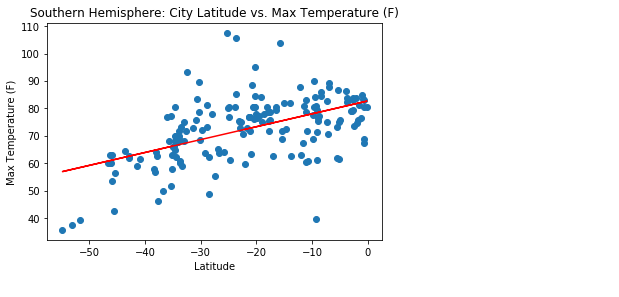

In [29]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_lat_south, y_temp_south)
plt.plot(x_lat_south, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/south_maxtempvslat.png')

In [30]:
# Perform a linear regression on Northern Hemisphere Humidity (%) vs. Latitude
x_lat_north = northern_weather["Latitude"]
y_humidity_north = northern_weather["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_humidity_north)

# Get regression values
regress_values = x_lat_north * slope + intercept
print(regress_values)

0      66.058568
2      81.879956
3      75.047758
4      62.253729
6      82.726240
         ...    
569    82.361581
570    74.194594
571    64.888907
572    67.025258
573    70.190224
Name: Latitude, Length: 403, dtype: float64


y = 0.34x +60.39
The r-squared is: 0.09935328491032695


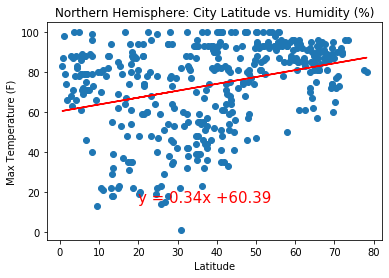

In [31]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_lat_north, y_humidity_north)
plt.plot(x_lat_north, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Northern Hemisphere: City Latitude vs. Humidity (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/north_humidityvslat.png')

In [32]:
# Perform a linear regression on Southern Hemisphere Temperature vs. Latitude
x_lat_south = southern_weather["Latitude"]
y_humidity_south = southern_weather["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_humidity_south)

# Get regression values
regress_values = x_lat_south * slope + intercept
print(regress_values)

1      66.245250
5      60.012498
7      77.518281
11     66.186320
12     66.467105
         ...    
557    78.221978
558    74.270178
561    75.542380
564    72.360141
574    70.779421
Name: Latitude, Length: 172, dtype: float64


The r-squared is: 0.0515943181930109


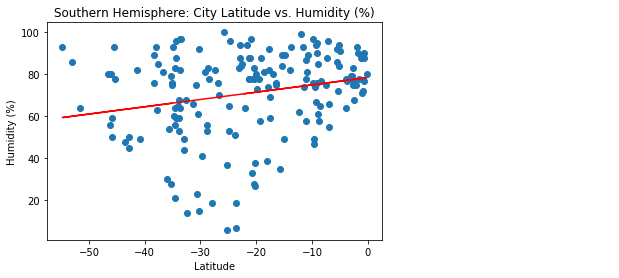

In [33]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_lat_south, y_humidity_south)
plt.plot(x_lat_south, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Southern Hemisphere: City Latitude vs. Humidity (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/south_humidityvslat.png')

In [34]:
# Perform a linear regression on Northern Hemisphere Cloudiness (%) vs. Latitude
x_lat_north = northern_weather["Latitude"]
y_cloudiness_north = northern_weather["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_cloudiness_north)

# Get regression values
regress_values = x_lat_north * slope + intercept
print(regress_values)

0      40.172663
2      64.212927
3      53.831548
4      34.391291
6      65.498838
         ...    
569    64.944747
570    52.535182
571    38.395388
572    41.641529
573    46.450628
Name: Latitude, Length: 403, dtype: float64


The r-squared is: 0.06834223255073811


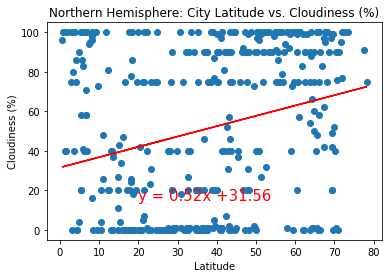

In [35]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_lat_north, y_cloudiness_north)
plt.plot(x_lat_north, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/north_cloudsvslat.png')

In [36]:
# Perform a linear regression on Southern Hemisphere Temperature vs. Latitude
x_lat_south = southern_weather["Latitude"]
y_cloudiness_south = southern_weather["Cloudiness (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_cloudiness_south)

# Get regression values
regress_values = x_lat_south * slope + intercept
print(regress_values)

1      44.732331
5      34.310727
7      63.581639
11     44.633795
12     45.103289
         ...    
557    64.758271
558    58.150580
561    60.277793
564    54.956863
574    52.313787
Name: Latitude, Length: 172, dtype: float64


The r-squared is: 0.03848765003573201


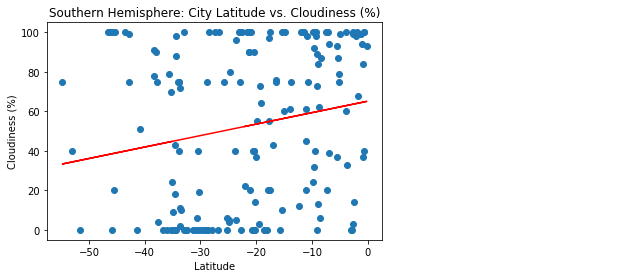

In [37]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_lat_south, y_cloudiness_south)
plt.plot(x_lat_south, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/south_cloudsvslat.png')

In [38]:
# Perform a linear regression on Northern Hemisphere Wind Speed (mph) vs. Latitude
x_lat_north = northern_weather["Latitude"]
y_wind_north = northern_weather["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_north, y_wind_north)

# Get regression values
regress_values = x_lat_north * slope + intercept
print(regress_values)

0      16.47
2      62.46
3      42.60
4       5.41
6      64.92
       ...  
569    63.86
570    40.12
571    13.07
572    19.28
573    28.48
Name: Latitude, Length: 403, dtype: float64


The r-squared is: 1.0


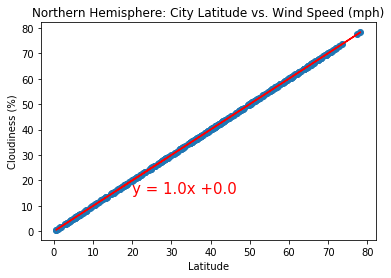

In [39]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_lat_north, y_wind_north)
plt.plot(x_lat_north, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/north_windspeedvslat.png')

In [40]:
# Perform a linear regression on Southern Hemisphere Temperature vs. Latitude
x_lat_south = southern_weather["Latitude"]
y_wind_south = southern_weather["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat_south, y_wind_south)

# Get regression values
regress_values = x_lat_south * slope + intercept
print(regress_values)

1     -35.17
5     -53.15
7      -2.65
11    -35.34
12    -34.53
       ...  
557    -0.62
558   -12.02
561    -8.35
564   -17.53
574   -22.09
Name: Latitude, Length: 172, dtype: float64


The r-squared is: 1.0


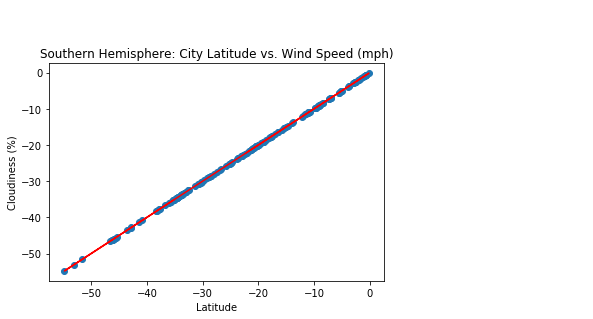

In [41]:
# Slope Equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))


plt.scatter(x_lat_south, y_wind_south)
plt.plot(x_lat_south, regress_values, "r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (20,15), fontsize=15, color="red")
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")

plt.savefig('../output_data/south_windspeedvslat.png')